In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import warnings



In [9]:
warnings.filterwarnings('ignore')
# Load the dataset
file_path = "Data_Source/Global_Economy_Indicators.csv"
data = pd.read_csv(file_path)
data = pd.read_csv(file_path)


# Clean and preprocess the data
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()  # Standardize column names
data['country'] = data['country'].str.strip()  # Remove spaces in country names

# Data Cleaning: Handle missing values
sector_columns = [
    'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
    'manufacturing_(isic_d)',
    'mining,_manufacturing,_utilities_(isic_c-e)',
    'transport,_storage_and_communication_(isic_i)',
    'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)'
]

data[sector_columns] = data[sector_columns].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
data.fillna(0, inplace=True)  # Fill missing values with 0

# # One-hot encoding for the 'country' column
# data = pd.get_dummies(data, columns=['country'], prefix='country')

# # One-hot encoding for the 'currency' column
# data = pd.get_dummies(data, columns=['currency'], prefix='currency')

# # Display the first few rows of the transformed dataset
# print(data.head())

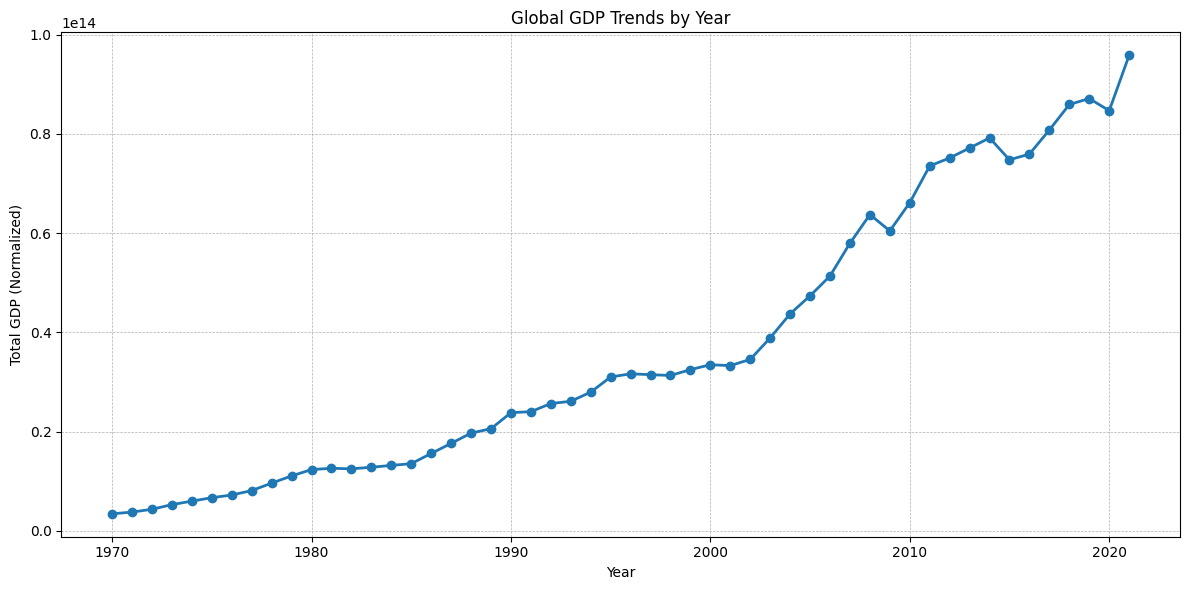

In [10]:
# 1. GDP Trends by Year
gdp_by_year = data.groupby('year')['gross_domestic_product_(gdp)'].sum()
plt.figure(figsize=(12, 6))
plt.plot(gdp_by_year.index, gdp_by_year.values, marker='o', linestyle='-', linewidth=2)
plt.title("Global GDP Trends by Year")
plt.xlabel("Year")
plt.ylabel("Total GDP (Normalized)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Correlation Analysis: Population vs GDP
plt.figure(figsize=(10, 6))
sns.regplot(
    x='population',
    y='gross_domestic_product_(gdp)',
    data=data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=None
)
plt.title(f"Correlation between Population and GDP")
plt.xlabel("Population (Normalized)")
plt.ylabel("GDP (Normalized)")
plt.xscale('log')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 3. Sectoral Contributions: Global Aggregation
sector_columns = [
    'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
    'manufacturing_(isic_d)',
    'mining,_manufacturing,_utilities_(isic_c-e)',
    'transport,_storage_and_communication_(isic_i)',
    'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)'
]
global_sector_data = data[sector_columns].mean()
global_sector_data.plot(
    kind='bar',
    figsize=(12, 6),
    title="Global Sectoral Contributions to GDP",
    grid=True
)
plt.ylabel("Average Contribution (Normalized)")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 4. GDP Trends by Selected Countries
selected_countries = ["United States", "India", "China", "Germany", "Brazil"]

# One-hot encoding for the 'country' column
data = pd.get_dummies(data, columns=['country'], prefix='country')

# Update to use one-hot encoded columns for filtering
selected_columns = [f'country_{country}' for country in selected_countries]
filtered_data = data[data[selected_columns].sum(axis=1) > 0]  # Select rows where any of the selected countries is 1

plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_column = f'country_{country}'
    country_data = filtered_data[filtered_data[country_column] == 1]  # Filter rows for the specific country
    plt.plot(
        country_data['year'],
        country_data['gross_domestic_product_(gdp)'],  # Normalized GDP column (if applicable)
        marker='o',
        label=country.replace('_', ' ')  # Convert underscores back to spaces for labels
    )

plt.title("GDP Trends Over Time for Selected Countries")
plt.xlabel("Year")
plt.ylabel("GDP (Normalized)")  # Update the ylabel if the GDP is not normalized
plt.legend(title="Country")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 5. GDP Per Capita Analysis
data['gdp_per_capita'] = data['gross_domestic_product_(gdp)'] / data['population']

# Map selected countries to their one-hot encoded columns
selected_country_columns = [f'country_{country}' for country in selected_countries]

# Filter rows where at least one selected country column is 1
filtered_data = data[data[selected_country_columns].sum(axis=1) > 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Create a country column for display in the boxplot
filtered_data['country'] = filtered_data[selected_country_columns].idxmax(axis=1)  # Identify the country column
filtered_data['country'] = filtered_data['country'].str.replace('country_', '', regex=False)  # Remove the prefix for display

# Ensure the y-axis column exists in the filtered dataset
if 'gdp_per_capita' not in filtered_data.columns:
    raise ValueError("Column 'gdp_per_capita' is missing in the filtered dataset.")

# Plot GDP per capita analysis
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='country',
    y='gdp_per_capita',
    data=filtered_data,
    order=selected_countries
)
plt.title("GDP Per Capita Comparison Among Selected Countries")
plt.xlabel("Country")
plt.ylabel("GDP Per Capita (Actual)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()